In [8]:
import sys
sys.path.append("/home/wanxinli/EHR-OT/")

from ast import literal_eval
import collections
from mimic_common import *
import os
import pandas as pd
from statistics import mean, stdev

In [48]:
def read_plot(group_name, group_1, group_2, eval_metric, ax, xaxis):
    """ 
    Read the dataframe and plot
    :param str xaxis: xaxis can be either label or w_term
    """

    score_path = os.path.join(mimic_output_dir, f"exp4_{group_name}_{group_2}2{group_1}_OT.csv")
    score_df = pd.read_csv(score_path, header=0, index_col=None)

    # plt.figure()
    # sc = plt.scatter(score_df['label_div_score'], score_df['wa_dist'], c=score_df[f'trans_target_{eval_metric}'], s=5)
    # plt.title(f'Source: {group_1} \n Target: {group_2}')
    # plt.colorbar(sc)
    # plt.xlabel('labeling divergence score')
    # plt.ylabel('Wasserstein distance + unbalanced degree')
    # plt.show()

    # plt.figure()
    if xaxis == 'label_div_score':
        ax.scatter(score_df['label_div_score'], score_df[f'trans_target_{eval_metric}'], s=3)
    else:
        wa_term = np.multiply(score_df['max_h'], (score_df['wa_dist'] + np.multiply(score_df['diameter'], score_df['coupling_diff'])))
        ax.scatter(wa_term, score_df[f'trans_target_{eval_metric}'], s=3)
    # ax.set_title(f'Source: {group_1} \n Target: {group_2}')
    # ax.set_xlabel('labeling divergence score')
    # ax.set_ylabel('rmse')
    # plt.show()


    # plt.figure()
    # wa_term = np.multiply(score_df['max_h'], (score_df['wa_dist'] + np.multiply(score_df['diameter'], score_df['coupling_diff'])))
    # plt.scatter(wa_term, score_df[f'trans_target_{eval_metric}'], s=5)
    # plt.title(f'Source: {group_1} \n Target: {group_2}')
    # plt.xlabel('Wasserstein distance + unbalanced degree')
    # plt.ylabel('rmse')
    # plt.show()

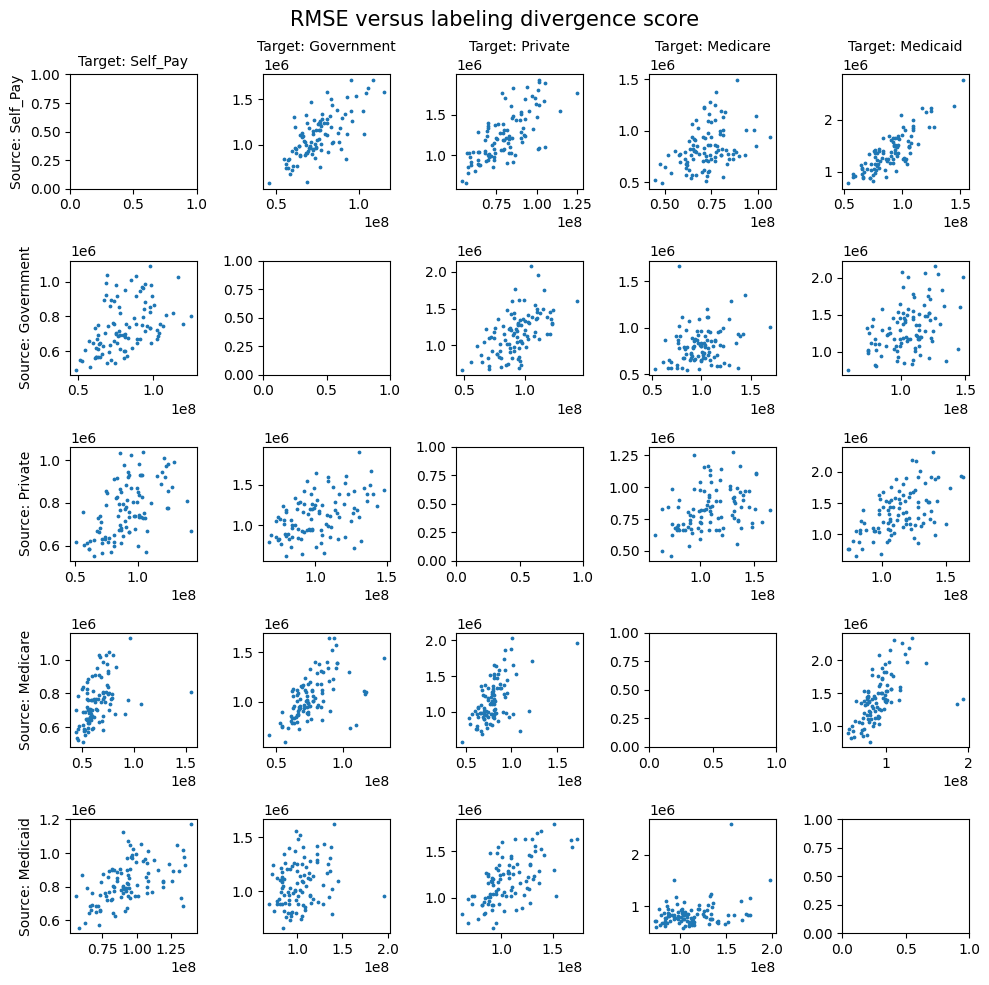

In [75]:
group_name = 'insurance'
groups = ['Self_Pay', 'Government', 'Private',  'Medicare', 'Medicaid']
eval_metric = 'rmse'
fig, axs = plt.subplots(len(groups), len(groups))
fig.set_figwidth(10)
fig.set_figheight(10)
xaxis = "label_div_score"

for i, group_1 in enumerate(groups):
    for j, group_2 in enumerate(groups):
        if j == 0:
            axs[i, j].set_ylabel(f'Source: {group_1}', fontsize=10)
        if i == 0:
            axs[i, j].set_title(f'Target: {group_2}', fontsize=10)
        if group_1 == group_2:
            # axs[i, j].axis('off')
            continue

        # if j == 0:
        read_plot(group_name, group_1, group_2, eval_metric, axs[i, j], xaxis)
fig.suptitle("RMSE versus labeling divergence score", fontsize=15)
plt.tight_layout()
fig_path = os.path.join(mimic_output_dir, f"exp4_{group_name}_{xaxis}_bound.pdf")
plt.savefig(fig_path)
plt.show()


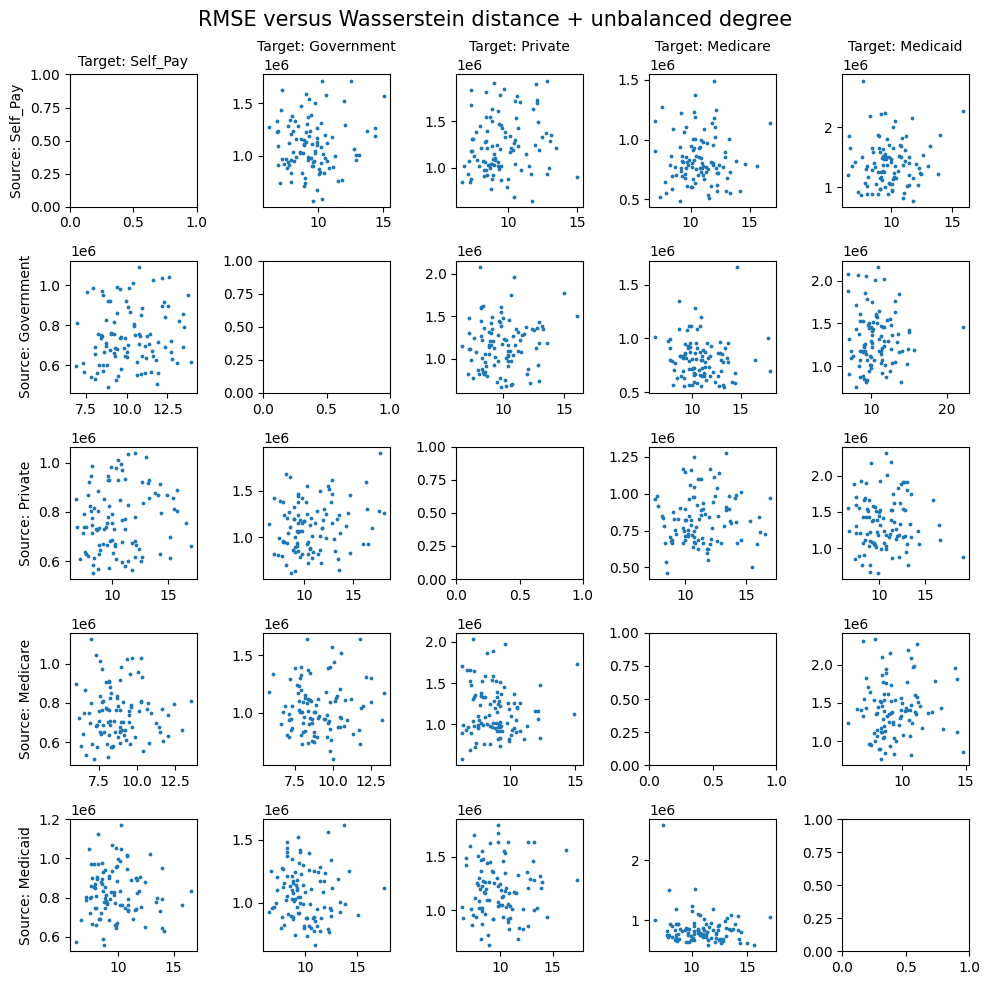

In [76]:
group_name = 'insurance'
groups = ['Self_Pay', 'Government', 'Private',  'Medicare', 'Medicaid']
eval_metric = 'rmse'
fig, axs = plt.subplots(len(groups), len(groups))
fig.set_figwidth(10)
fig.set_figheight(10)
xaxis = "w_term"

for i, group_1 in enumerate(groups):
    for j, group_2 in enumerate(groups):
        if j == 0:
            axs[i, j].set_ylabel(f'Source: {group_1}', fontsize=10)
        if i == 0:
            axs[i, j].set_title(f'Target: {group_2}', fontsize=10)
        if group_1 == group_2:
            # axs[i, j].axis('off')
            continue

        # if j == 0:
        read_plot(group_name, group_1, group_2, eval_metric, axs[i, j], xaxis)
fig.suptitle("RMSE versus Wasserstein distance + unbalanced degree", fontsize=15)
plt.tight_layout()
fig_path = os.path.join(mimic_output_dir, f"exp4_{group_name}_{xaxis}_bound.pdf")
plt.savefig(fig_path)
plt.show()


In [11]:
group_name = "insurance"
group_1 = 'Medicare'
group_2 = 'Medicaid'
score_path = os.path.join(mimic_output_dir, f"exp4_{group_name}_{group_2}2{group_1}_OT.csv")
score_df = pd.read_csv(score_path, header=0, index_col=None)
score_df


,source_mae,source_mse,source_rmse,target_mae,target_mse,target_rmse,trans_target_mae,trans_target_mse,trans_target_rmse,label_div_score,wa_dist,coupling_diff,diameter,max_h
0,371692.481596,2.167139e+11,465525.453354,8.467401e+05,1.335374e+12,1.155584e+06,7.533922e+05,1.229976e+12,1.109043e+06,7.786926e+07,35.724427,0.257236,1.0,0.215420
1,318147.297594,1.913885e+11,437479.724276,7.711606e+05,1.794004e+12,1.339404e+06,7.533137e+05,1.926205e+12,1.387878e+06,6.326644e+07,30.201620,0.297381,1.0,0.280477
2,265345.413441,1.181217e+11,343688.364630,8.263654e+05,2.315974e+12,1.521832e+06,7.704963e+05,2.147853e+12,1.465556e+06,7.822186e+07,36.326400,0.254179,1.0,0.229374
3,407155.442827,4.668956e+11,683297.568561,1.299599e+06,5.385647e+12,2.320700e+06,1.047881e+06,5.130089e+12,2.264970e+06,1.191799e+08,37.894595,0.242261,1.0,0.292558
4,261043.417900,1.305997e+11,361385.748379,6.680056e+05,9.542845e+11,9.768749e+05,6.120253e+05,9.206290e+11,9.594941e+05,5.555124e+07,34.983539,0.265696,1.0,0.211456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,259190.303015,1.070240e+11,327145.187556,8.152322e+05,2.559006e+12,1.599689e+06,7.277557e+05,2.329252e+12,1.526189e+06,7.823584e+07,36.111801,0.254956,1.0,0.225998
96,389517.859859,2.900175e+11,538532.738310,9.230626e+05,3.546964e+12,1.883338e+06,7.482135e+05,2.606375e+12,1.614427e+06,9.173039e+07,35.187976,0.261174,1.0,0.240728
97,289971.714248,1.542001e+11,392683.163507,1.069854e+06,2.648891e+12,1.627542e+06,8.455270e+05,1.875793e+12,1.369596e+06,1.001435e+08,31.702015,0.289556,1.0,0.251062
98,373720.167210,2.875132e+11,536202.560376,9.188385e+05,2.026797e+12,1.423656e+06,7.495984e+05,1.512860e+12,1.229984e+06,8.632808e+07,34.389821,0.269492,1.0,0.268295


In [12]:
eval_metric = 'rmse'
# metric_ratios = np.divide(score_df[f'trans_target_{eval_metric}']score_df[f'target_{eval_metric}'], score_df[f'target_{eval_metric}'])
sc = plt.scatter(combined_df['label_div_score'], combined_df['wa_dist'], c=combined_df[f'trans_target_{eval_metric}'], s=5)
plt.colorbar(sc)
plt.show()

NameError: name 'combined_df' is not defined

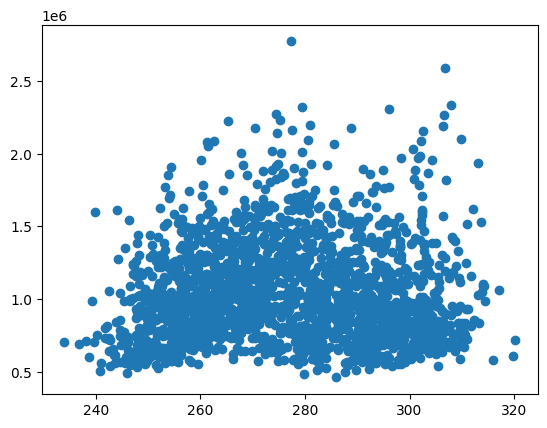

In [ ]:
plt.scatter(combined_df['wa_dist'], combined_df[f'trans_target_{eval_metric}'])
plt.show()